In [20]:
import pandas as pd
from upsetplot import UpSet, from_memberships
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set global dpi to 300
plt.rcParams['figure.dpi'] = 300
# Set color palette to colorblind
sns.set_palette("colorblind")

In [21]:
df = pd.read_csv('dea/annotation.bed', sep="\t", header=None, names=['chr', 'start', 'end', 'name', 'score', 'strand','type', 'gene_id', 'gene_name', 'transcript_id', 'database'], index_col=False)

In [22]:
plt.rcParams.update({'font.size': 12})

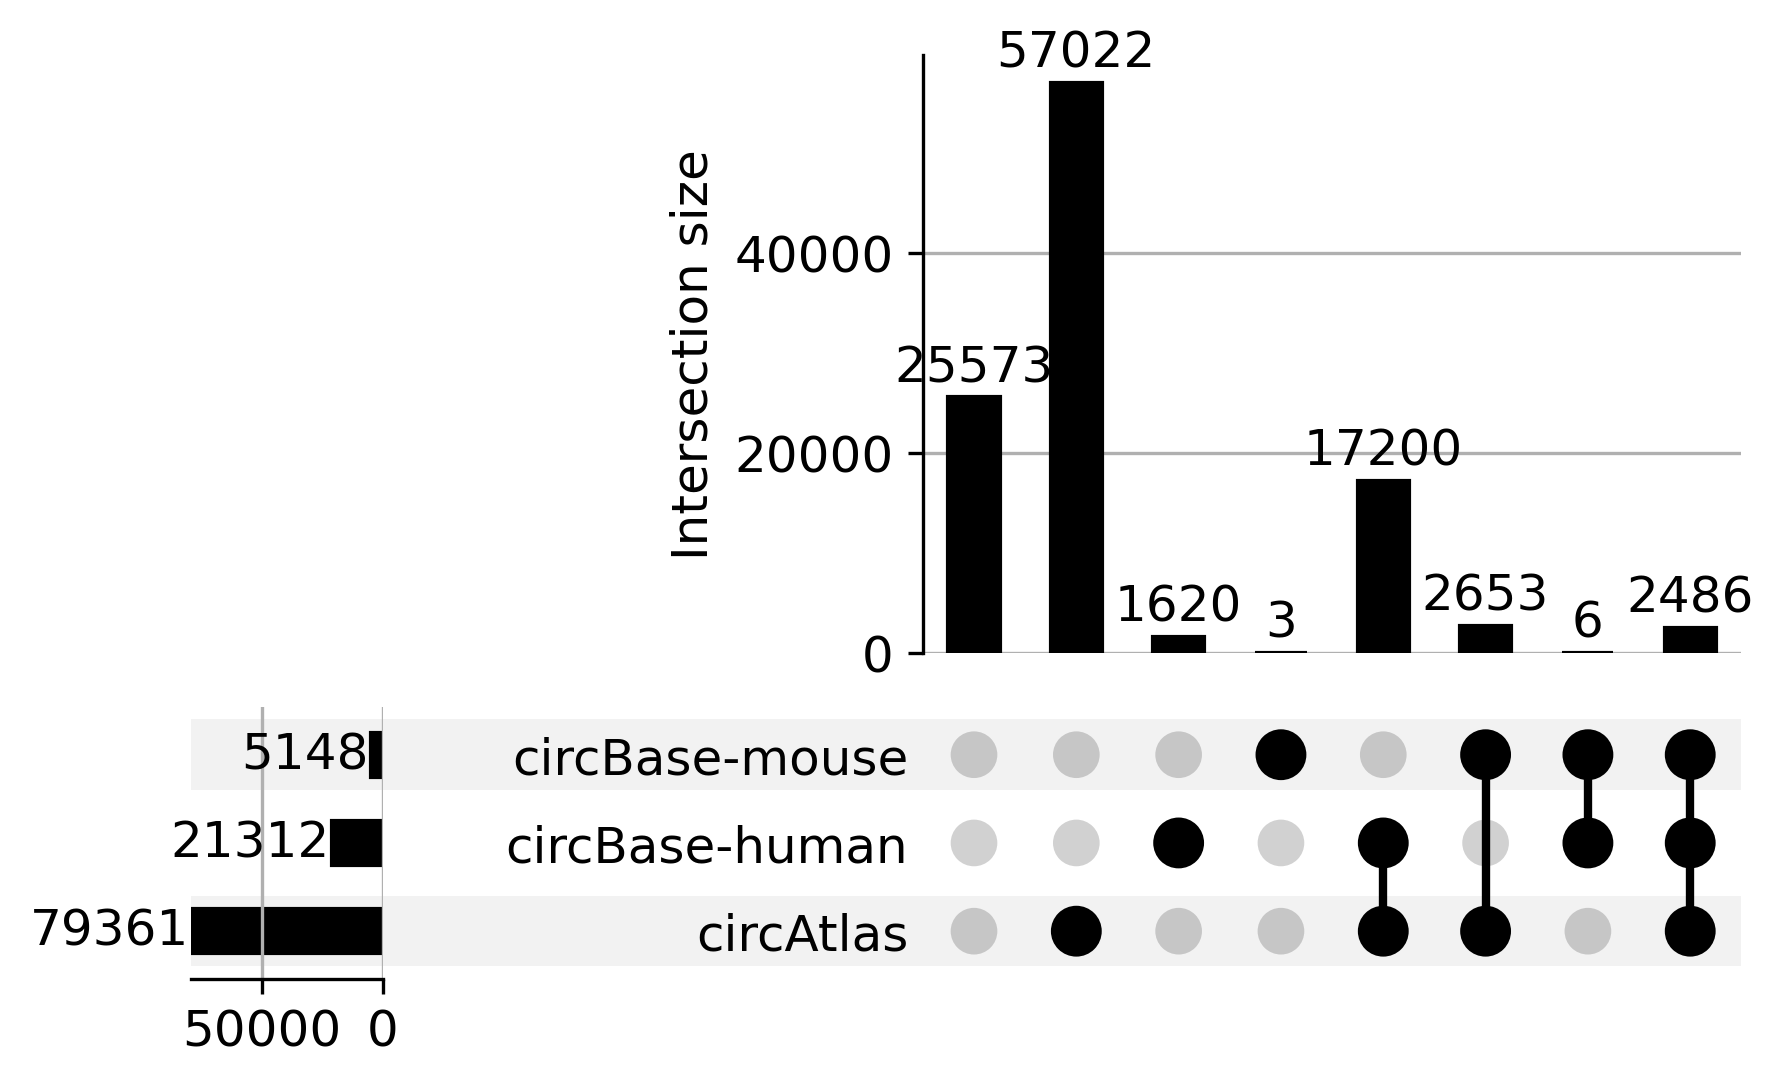

In [23]:
databases = df["database"].str.split(",").map(lambda x: [i.split(":")[0] for i in x]).map(lambda x: list(set([i for i in x if i != "." and not i.startswith("ENS")])))

mapping = {
    "circBase": "circBase-mouse",
    "circBase_lifted": "circBase-human",
    "circAtlas": "circAtlas"
}
databases = databases.map(lambda x: [mapping.get(i, i) for i in x])

plotdata = from_memberships(databases)
upset = UpSet(plotdata, subset_size="count", show_counts=True)
upset.plot()
plt.savefig("../chapters/4_results_and_discussion/figures/detection/database_upset.png")
#plt.close()

In [24]:
plt.rcParams.update({'font.size': 20})

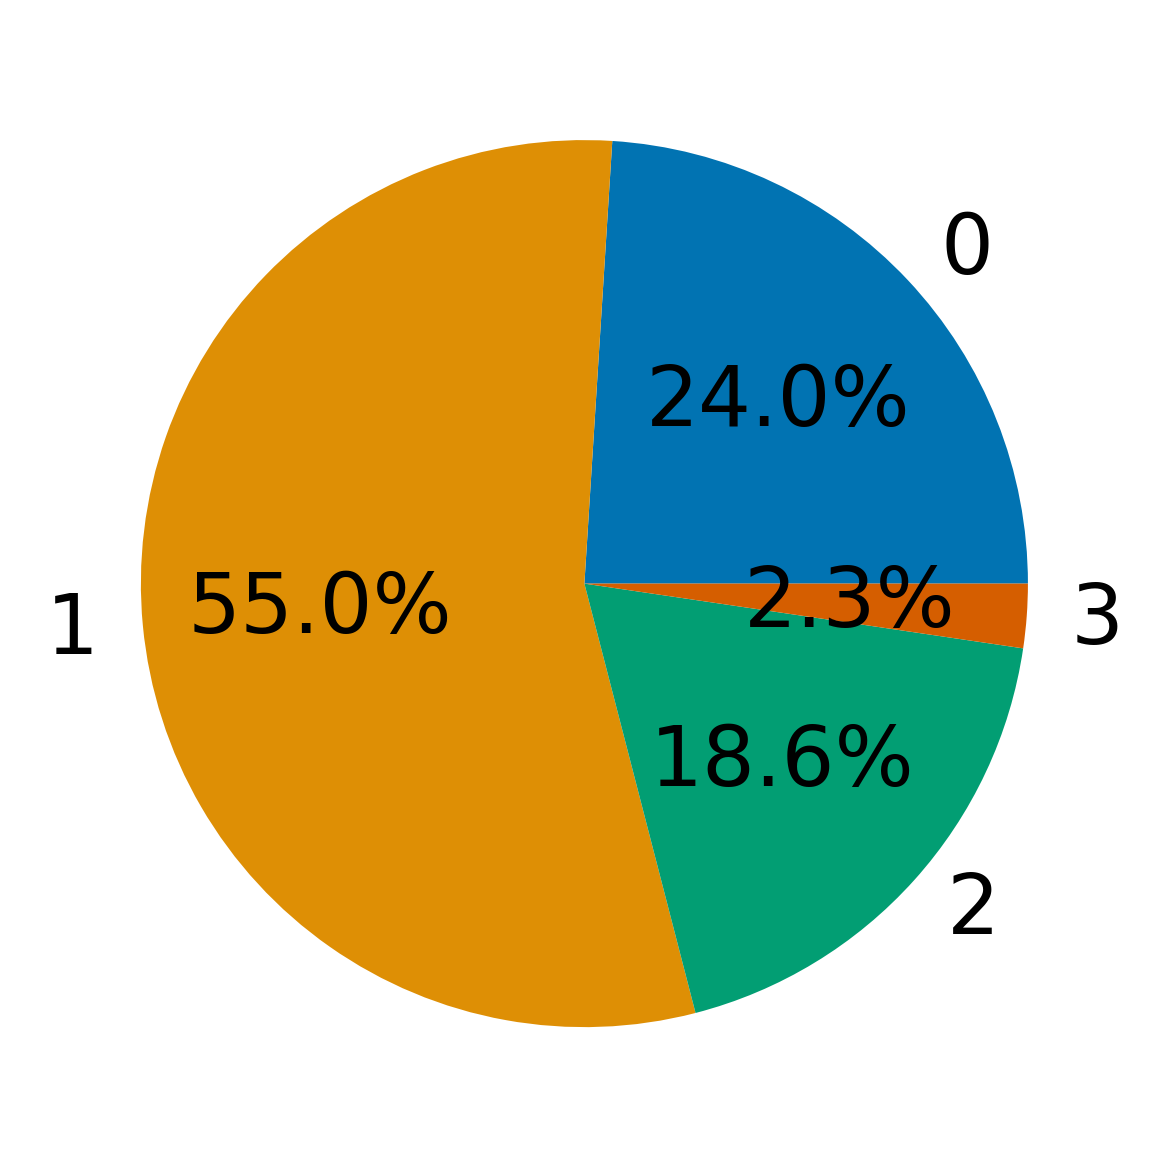

In [25]:
db_counts = databases.map(len).value_counts()

# Sort by index
db_counts = db_counts.sort_index()

db_counts.plot(kind='pie', autopct='%1.1f%%')

plt.ylabel('')
plt.savefig('../chapters/4_results_and_discussion/figures/detection/database_count.png')
#plt.close()

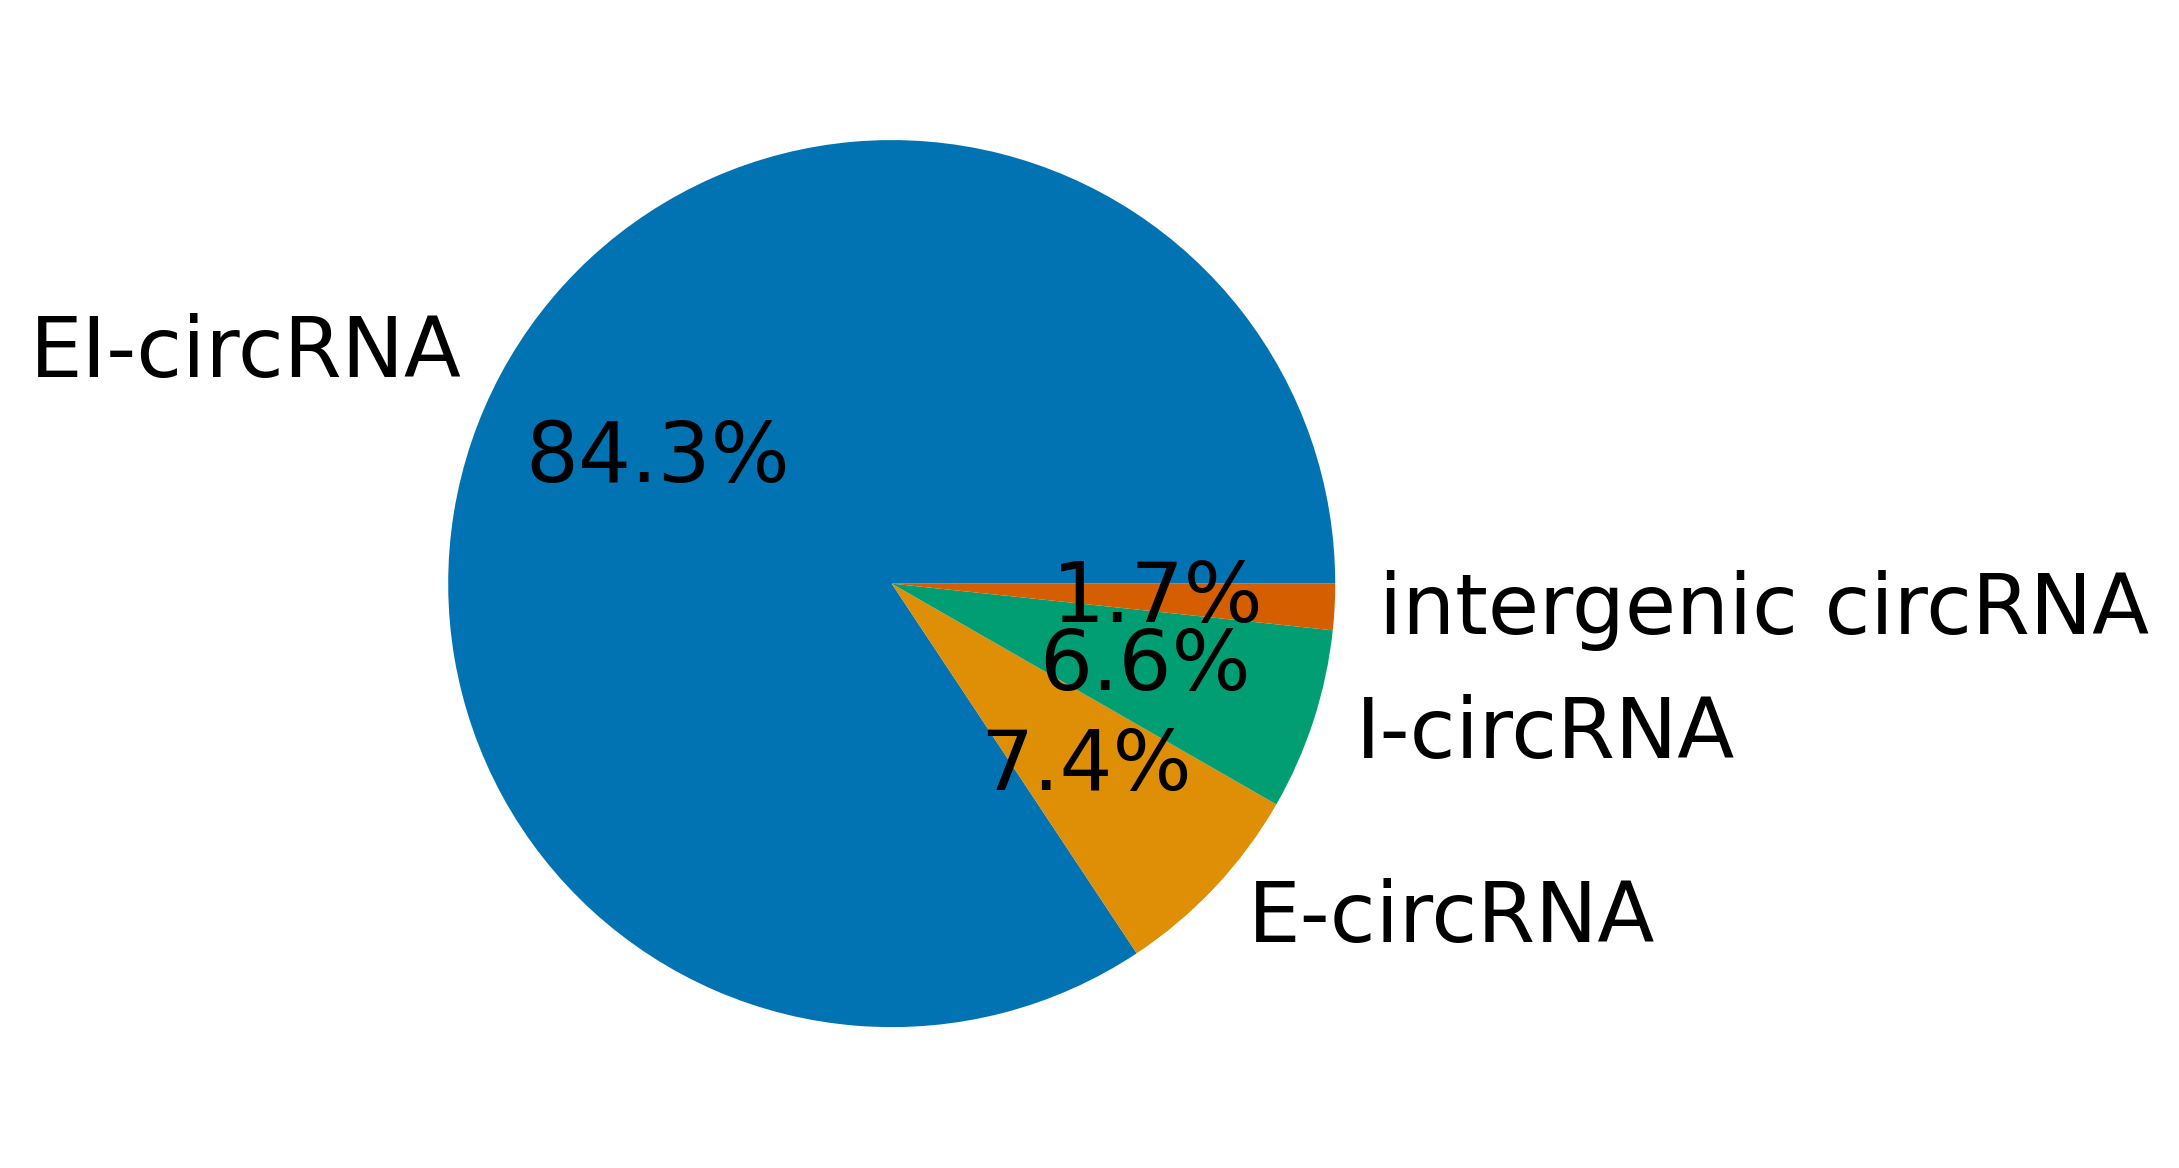

In [26]:
type_map = {
    "EI-circRNA": "EI-circRNA",
    "ciRNA": "I-circRNA",
    "circRNA": "E-circRNA",
    "intergenic-circRNA": "intergenic circRNA",
    "partially_intergenic-circRNA": "intergenic circRNA",
}
df['type'].map(type_map).value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.savefig('../chapters/4_results_and_discussion/figures/detection/types.png')
#plt.close()